FSEOF analysis
FSEOF analysis stands for flux scanning based on enforced objective flux. This type of analysis can indicate which reactions can be changed in flux to increase the production of the compound of interest. This is done by enforcing an increasing flux of the objective, here the ethanol exchange reaction.

In [1]:
from cameo import models

In [2]:
from cameo.visualization.plotting.with_plotly import PlotlyPlotter

In [3]:
from cobra.io import read_sbml_model, write_sbml_model

Load the Lactobacillus lactils model.

In [4]:
model = read_sbml_model('iNF517.xml')

In [5]:
plotter = PlotlyPlotter()

Flux Scanning based on Enforced Objective Flux

In [6]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

In [7]:
fseof = FSEOF(model)

In [8]:
result = fseof.run(target=model.reactions.EX_etoh_e)

In [120]:
result.data_frame[0:207]

,1,2,3,4,5,6,7,8,9,10
ACALDt,-0.125919,-0.108060,-0.090202,-0.072343,-0.054484,-0.036625,-0.018766,-0.000908,-0.000000,0.000000
ADPTA,-0.015159,-0.015159,-0.015159,-0.015159,-0.015159,-0.015159,-0.015159,-0.015159,-0.015159,-0.015159
ACHBS,0.072044,0.072044,0.072044,0.072044,0.072044,0.072044,0.072044,0.072044,0.063569,0.054639
BIOMASS_LLA,0.042635,0.042635,0.042635,0.042635,0.042635,0.042635,0.042635,0.042635,0.042635,0.042635
ACLS,0.132986,0.138939,0.144892,0.150845,0.156798,0.162751,0.168704,0.174657,0.186260,0.198166
...,...,...,...,...,...,...,...,...,...,...
MCMAT5,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193
MCMAT6,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193,0.005193
MCMAT7,0.004700,0.004700,0.004700,0.004700,0.004700,0.004700,0.004700,0.004700,0.004700,0.004700
MCMAT8,0.003012,0.003012,0.003012,0.003012,0.003012,0.003012,0.003012,0.003012,0.003012,0.003012


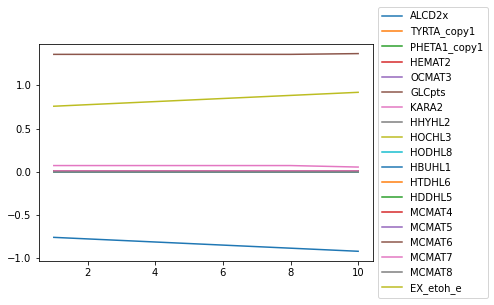

In [123]:
from matplotlib import pyplot as plt
result.data_frame[188:].T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Image/FSEOF.png')
plt.show()

From the FSEOF analysis, we can see that reaction ALCD2x is negative. This might suggests that a decrease in this reaction is correlated with an increase in production of Ex_etoh_e. 

We can therefore try to knock out this reaction and see if it changes anything.

In [127]:
model.reactions.ALCD2x

Reaction identifier,ALCD2x
Name,Alcohol dehydrogenase (ethanol)
Memory address,0x020fb6222d00
Stoichiometry,etoh_c + nad_c <=> acald_c + h_c + nadh_c Ethanol + Nicotinamide adenine dinucleotide <=> Acetaldehyde + H+ + Nicotinamide adenine dinucleotide - reduced
GPR,LLMG_RS04865 or LLMG_RS12215
Lower bound,-1000.0
Upper bound,1000.0


Differential flux variability analysis

In [97]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 

In [100]:
# ALCD2x knockout
with model:    
    print("Normal growth conditions")
    print("Maximal biomass:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_etoh_e
    print("Maximal ethanol production rate:）")
    print('%.17f'%model.slim_optimize())

Normal growth conditions
Maximal biomass:
0.04263460544337332
Maximal ethanol production rate:）
1.02000000000000002


In [125]:
with model:
    model.reactions.ALCD2x.knock_out()
    print("\nWithout Alcohol dehydrogenase")
    print("Maximal biomass:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_etoh_e
    print("Maximal ethanol production rate")
    print('%.17f'%model.slim_optimize())
    ppp_etoh_e = production_envelope(model,
                    reactions=[model.reactions.EX_etoh_e],
                    objective=model.reactions.BIOMASS_LLA)
    pppp = ppp_etoh_e.plot(x='EX_etoh_e', y='flux_maximum')
    fig = pppp.get_figure()
    plt.title(label="ALCD2x knockout")
    fig.savefig("Image/ALCD2x_knockout_ppp")


Without Alcohol dehydrogenase
Maximal biomass:
nan
Maximal ethanol production rate
nan


Infeasible: There is no optimal solution for the chosen objective! (infeasible).

This fseof analysis did not yield any fruitful results.
Due to the low production under ALCD2x knocking-out, this is not further utilised in the project.